# Community detection

Last time we were learning the patterns in the networks looking on how they are affected by spatial distance. Now we'll look into the structural heterogeniety of the networks, focusing on their community structure.

Community in the network is usually defined as a set of nodes being more strongly connected internally compared to their connections to the rest of the network.

What is the connection strength? Measure is by comparing the edge weight with the average expected one with respect to the origin and destination node strength, normalized by the total network weight. In case of a directed network this is:
$$
q(x,y)=\frac{e(x,y)}{T}-\frac{k_x^{out}k_y^{in}}{T^2},
$$
where $q(x,y)$ is the relative strength score between two nodes x and y, $e(x,y)$ is the edge weight, $T$ - total network weight, $k_x^{out}$ - outgoing strength of the node $x$, $k_y^{in}$ - incoming strength of the node $y$.

Then edges with positive relative strength scores (stronger than average) are preferred by the community detection to be located inside the community, while edges with negative score are avoided (preferred to lay between communities). Then given a certain paritioning $P=(c_x, x\in N)$ - a vector of discrete community numbers $c_x$ associated with each node $x$ of the set $N$ - one can define the overall modularity score
$$
Q(P)=\sum\limits_{x,y,\ c_x=c_y}q(x,y)=\sum\limits_{x,y,\ c_x=c_y}\left[\frac{e(x,y)}{T}-\frac{k_x^{out}k_y^{in}}{T^2}\right],
$$
In case of an undirected network, one can treat is as directed with the same edge weights $e(x,y)=e(y,x)$ going in both directions between $x$ and $y$ and given that $k_x^{in}=k_x^{out}=k_x$, where $k_x$ is the total node strength in the original undirected network, the above equation can be written as
$$
Q(P)=\sum\limits_{x,y,\ c_x=c_y}q(x,y)=\sum\limits_{x,y,\ c_x=c_y}\left[\frac{e(x,y)}{T}-\frac{k_x k_y}{T^2}\right].
$$
where $T$ is the total weight of the network, while any edge is taken twice with the exteption of the loop edges which are taken only once.

It is easy to see that modularity score is normalized
$$
-1<Q<1
$$
as
$$
-1=-\sum\limits_{x,y}\frac{k_x^{out}k_y^{in}}{T^2}<\sum\limits_{x,y,\ c_x=c_y}\left[\frac{e(x,y)}{T}-\frac{k_x^{out}k_y^{in}}{T^2}\right]<\sum\limits_{x,y}\frac{e(x,y)}{T}=1.
$$
Also for the trivial partitioning $P_0$ taking the entire network as one single community
$$
Q(P_0)=\sum\limits_{x,y}\left[\frac{e(x,y)}{T}-\frac{k_x^{out}k_y^{in}}{T^2}\right]=\sum\limits_{x,y}\frac{e(x,y)}{T}-\sum\limits_{x,y}\frac{k_x^{out}k_y^{in}}{T^2}=1-1=0.
$$
So a reasonable partitioning (better than a trivial one $P_0$) should have positive modularity, the higher the better (upper limit is 1, but usually it can not really be approached). Some sources refer to the networks admitting partitioning with modularity over 0.6 as highly modular, but this is rather a subjective judgement. The only universal guideline is to look for a partitioning having as high modularity score as possible and this is the objective of the entire family of modularity optimization algorithms.

An efficient (although still heuristic) algorithm for modularity optimization introduced in:

Sobolevsky, S., Campari, R., Belyi, A., & Ratti, C. (2014). General optimization technique for high-quality community detection in complex networks. Physical Review E, 90(1), 012811.

In [1]:
!pip install --upgrade pip setuptools wheel
!apt install libasound2-dev portaudio19-dev libportaudio2 libportaudiocpp0 ffmpeg
# for google colab users, please restart the runtime after this cell is done


Reading package lists... Done
Building dependency tree       
Reading state information... Done
libasound2-dev is already the newest version (1.1.3-5ubuntu0.5).
ffmpeg is already the newest version (7:3.4.8-0ubuntu0.2).
Suggested packages:
  portaudio19-doc
The following NEW packages will be installed:
  libportaudio2 libportaudiocpp0 portaudio19-dev
0 upgraded, 3 newly installed, 0 to remove and 31 not upgraded.
Need to get 184 kB of archives.
After this operation, 891 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libportaudio2 amd64 19.6.0-1 [64.6 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libportaudiocpp0 amd64 19.6.0-1 [15.1 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 portaudio19-dev amd64 19.6.0-1 [104 kB]
Fetched 184 kB in 1s (305 kB/s)
Selecting previously unselected package libportaudio2:amd64.
(Reading database ... 160983 files and directories currently installed.)
Preparing to 

In [1]:
!pip install pycombo
!pip install geopandas

     |████████████████████████████████| 133 kB 4.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Using cached pybind11-2.6.2-py2.py3-none-any.whl (191 kB)
  Using cached importlib_metadata-1.7.0-py2.py3-none-any.whl (31 kB)
  Created wheel for pycombo: filename=pycombo-0.1.6-cp37-cp37m-manylinux_2_27_x86_64.whl size=97171 sha256=8cd672c53411e12534c1b23ecdacb3473af58f41c5835b7336a303da82b339b2
  Stored in directory: /root/.cache/pip/wheels/7c/17/56/3d9cd1c2914076a218829b1988807f90f872eba515ee40ca1d
Successfully built pycombo
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 3.8.1
    Uninstalling importlib-metadata-3.8.1:
      Successfully uninstalled importlib-metadata-3.8.1


In [6]:
#add necessary libraries
import pycombo # combo community detection package
import networkx as nx #library supporting networks
import matplotlib.pyplot as plt #plotting
import pandas as pd
import numpy as np
import scipy.stats as stat
from scipy import optimize
#make sure plots are embedded into the notebook
%pylab inline 
import statsmodels.formula.api as smf
import os
from networkx.algorithms import community
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


If you have problem in pycombo installation and import, try "pip install --upgrade pip setuptools wheel" at first then install pycombo in a virtual environment.

# 1 Classic networks

Consider a couple of classic networks - Zachary's Karate Club, Les Miserables novel characters co-appearance and C. Elegans neural network.

In [3]:
#load the Zachary's Karate Club network
!curl -O https://raw.githubusercontent.com/CUSP2021ADS/Data/main/ClassicNet/karate.gml
Nkarate = nx.read_gml('karate.gml', label='id')

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4194  100  4194    0     0  22670      0 --:--:-- --:--:-- --:--:-- 22548


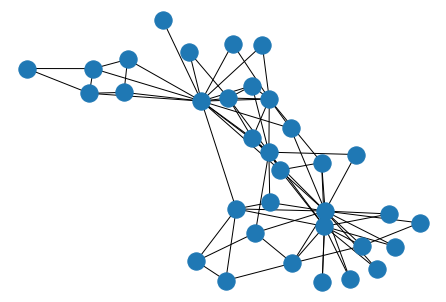

In [4]:
random.seed(2015)
nx.draw(Nkarate,pos=None)

In [13]:
def modularity(G, partition, correctLoops = False): #modularity of the networkx graph given partition dictionary; correctLoop - special flag to account for inconsistency in loop edge definition in some graphs
    A = np.array(nx.adjacency_matrix(G).todense(), dtype = float)
    if correctLoops and not isinstance(G,nx.DiGraph):
        A += np.diag(np.diag(A))
    wout = A.sum(axis=1)
    win = A.sum(axis=0)
    T = wout.sum()
    Q = A / T - np.matmul(wout.reshape(-1, 1), win.reshape(1, -1)) / (T ** 2)
    C = np.array([partition[n] for n in G.nodes()]) #could there be an indexing mismatch between Q and C
    return (Q * (C.reshape(-1,1) == C.reshape(1,-1))).sum()

In [14]:
def sets2dictPartition(spart): #convert list of partitions to dictionary
    part={}
    c=1
    for cset in spart:
        cpart={n:c for n in cset}
        part.update(cpart)
        c+=1
    return part    

In [8]:
#partition Karate Club network using greedy heuristic
PLKarate=community.greedy_modularity_communities(Nkarate)

In [9]:
PLKarate

[frozenset({9,
            15,
            16,
            19,
            21,
            23,
            24,
            25,
            26,
            27,
            28,
            29,
            30,
            31,
            32,
            33,
            34}),
 frozenset({2, 3, 4, 8, 10, 13, 14, 18, 22}),
 frozenset({1, 5, 6, 7, 11, 12, 17, 20})]

In [10]:
PLKarate=sets2dictPartition(PLKarate); PLKarate

{1: 3,
 2: 2,
 3: 2,
 4: 2,
 5: 3,
 6: 3,
 7: 3,
 8: 2,
 9: 1,
 10: 2,
 11: 3,
 12: 3,
 13: 2,
 14: 2,
 15: 1,
 16: 1,
 17: 3,
 18: 2,
 19: 1,
 20: 3,
 21: 1,
 22: 2,
 23: 1,
 24: 1,
 25: 1,
 26: 1,
 27: 1,
 28: 1,
 29: 1,
 30: 1,
 31: 1,
 32: 1,
 33: 1,
 34: 1}

In [11]:
print('Karate Club greedy partitioning modularity={0}'.format(modularity(Nkarate,PLKarate)))

Karate Club greedy partitioning modularity=0.3806706114398422


In [12]:
PCKarate, PCKarate_mod = pycombo.execute(Nkarate, max_communities = 0) #combo partition
PCKarate_mod

0.41978961209730403

In [13]:
print('Karate Club partitioning Modularity={0}'.format(modularity(Nkarate,PCKarate))) #verify with custom modularity implementation

Karate Club partitioning Modularity=0.41978961209730437


In [14]:
#visualize network partitioning given node locations pos
def visualizePartition(G,partition,pos):
    N=len(G.nodes())
    s=4+4*int(log10(N))
    plt.figure(figsize=(s,s))
    PN=max(partition.values())
    my_cmap = matplotlib.cm.hsv(np.linspace(0,1,PN+1)) #create a colormap for a given number of communities
    c=[]
    for n in G.nodes():
        c.append(1.0*partition[n]/PN)
    nx.draw(G,pos=pos,with_labels=False,arrows=True,node_size=300,node_color=c,width=1,edge_color='black')

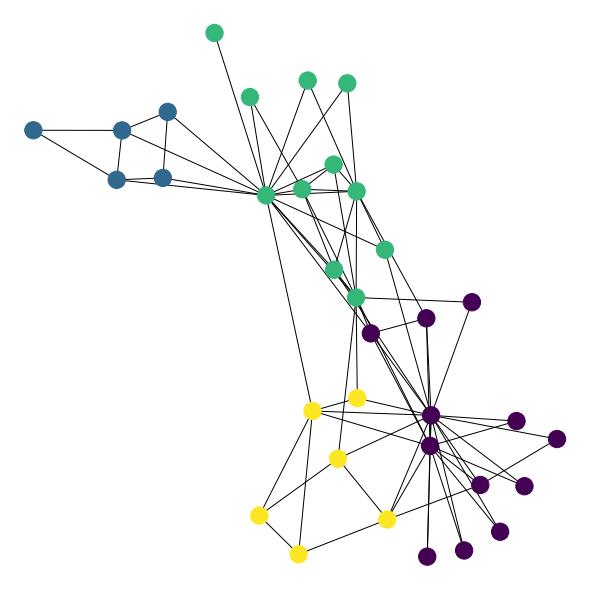

In [15]:
random.seed(2015)
visualizePartition(Nkarate,PCKarate,None)

In [16]:
PCKarate2, PCKarate2mod = pycombo.execute(Nkarate, max_communities = 2) #partition into just two communities
print('Karate Club bi-partitioning Modularity={0}'.format(PCKarate2mod))

Karate Club bi-partitioning Modularity=0.3717948717948713


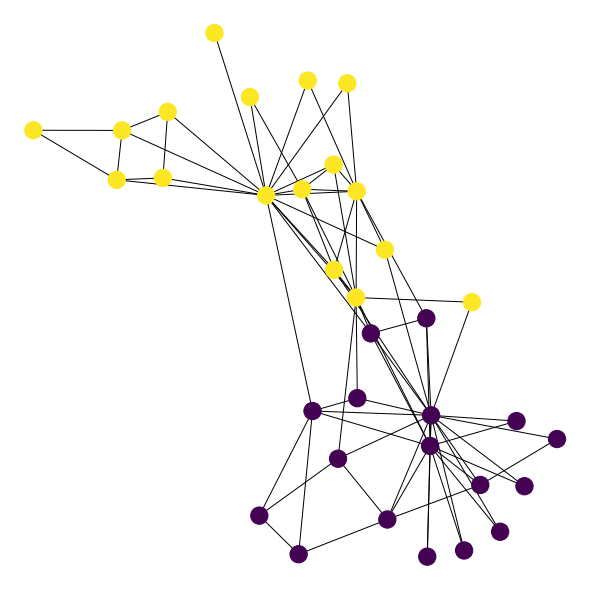

In [17]:
random.seed(2015)
visualizePartition(Nkarate,PCKarate2,None)

# 2 Migration network

In [7]:
# load state total population data (states numbered in the same order)
USmigration=pd.read_csv('https://raw.githubusercontent.com/CUSP2021ADS/Data/main/RNetData/USstates_migration.csv', header=0 )
USmigration.head()

,i,j,a
0,1,1,588293
1,2,1,93
2,3,1,833
3,4,1,691
4,5,1,2087


In [8]:
#creating a directed weighted graph of US migration adding all the edges
USmig=nx.DiGraph()
nx.set_edge_attributes(USmig,'weight', 0)
for k in USmigration.index:
    USmig.add_edge(USmigration.i[k]-1,USmigration.j[k]-1,weight=USmigration.a[k])

In [9]:
import geopandas as gpd
import os
import urllib

In [10]:
#load the collection of shapes for US states from the shapefile
#as we'll see below shapes can be thought as a closed sequence of points in space
if os.path.exists('USA_adm') == False:
    os.mkdir('USA_adm')
for form in ('.shp','.shx','.dbf'):
    url = 'https://github.com/CUSP2021ADS/Data/raw/main/USA_adm_data/USA_states_reduced'
    urllib.request.urlretrieve(url+form,'USA_adm/USA_states_reduced'+form)

USsf = gpd.read_file('USA_adm/USA_states_reduced.shp')
USsf = USsf.set_crs(4269)

In [11]:
#now perform partitioning based on the original network (with directions and loops) using Combo
PCUSmig, PCUSmid_mod = pycombo.execute(USmig, return_modularity = True, max_communities = 4)
PCUSmid_mod

0.6654801092286529

In [15]:
modularity(USmig,PCUSmig)

0.6654801092286535

In [16]:
#now perform partitioning based on the original network (with directions and loops) using Combo
PCUSmig2, PCUSmid_mod2 = pycombo.execute(USmig, return_modularity = True, max_communities = 2)
PCUSmid_mod2

0.45297831342159767

In [17]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
def visualizePartitionShape(gdf,Y,idfield): #take geopandas dataframe gdf with zip code shapefiles and the dictionary mapping zip codes to clusters
    #visualize shapes using communities for picking colors        
    Ncolors = max(Y.values())+1
    colormap = plt.cm.tab20
    Ncolors = min(colormap.N,Ncolors)
    mapcolors = [colormap(int(x*colormap.N/Ncolors)) for x in range(Ncolors)]
    
    f, ax = plt.subplots(1,figsize=(12,7))     
    for c in range(Ncolors): #for each cluster
        if idfield=='index':
            ID=gdf.index
        else:
            ID=gdf[idfield]
        gdf.loc[ID.map(Y)==c].plot(axes=ax, color=mapcolors[c]) #visualize zip codes which belong to it using cluster color

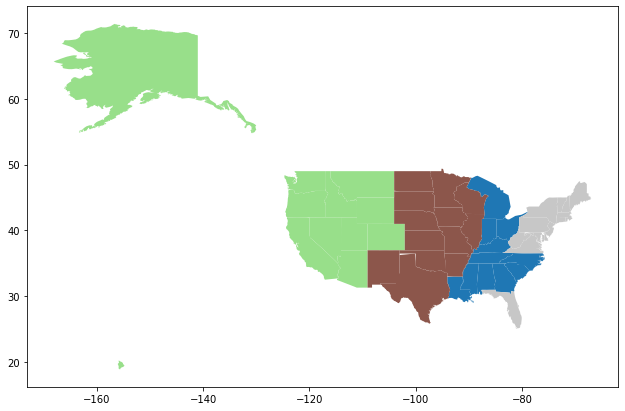

In [18]:
visualizePartitionShape(USsf,PCUSmig,'index')

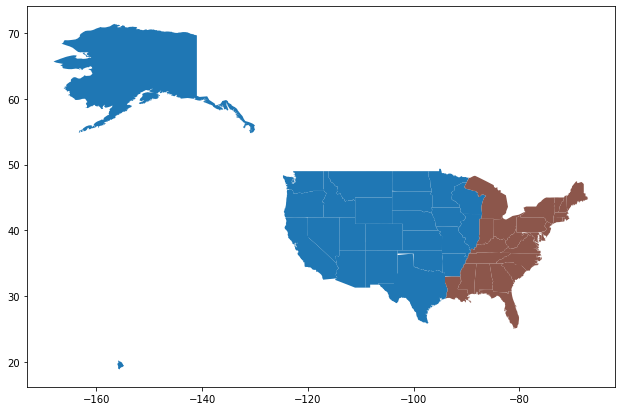

In [19]:
visualizePartitionShape(USsf,PCUSmig2,'index')

## 3 NYC Taxi network

In [20]:
taxi = pd.read_csv('https://raw.githubusercontent.com/CUSP2021ADS/Data/main/RNetData/NYCNet.csv',header=None)
taxi.head()

,0,1,2
0,1,1,1007.0
1,4,1,191.0
2,6,1,3.0
3,7,1,76.0
4,8,1,6.0


In [21]:
NYCtaxi=nx.DiGraph()
nx.set_edge_attributes(NYCtaxi,'weight', 0)
for k in taxi.index:
    NYCtaxi.add_edge(taxi[0][k]-1,taxi[1][k]-1,weight=taxi[2][k])

In [22]:
if os.path.exists('taxi_zones') == False:
    os.mkdir('taxi_zones')
for form in ('.shp','.shx','.dbf','.prj','.sbn','.sbx','.shp.xml'):
    url = 'https://github.com/CUSP2021ADS/Data/raw/main/taxi_zones/taxi_zones'
    urllib.request.urlretrieve(url+form,'taxi_zones/taxi_zones'+form)
NYCsf = gpd.read_file('taxi_zones/taxi_zones.shp')
NYCsf.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.770 256767.698, 1026495.593 ..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.310 144283.336, 936046.565 14..."


### Excercise 1

In [23]:
#partition the network using combo
PCtaxi, PCtaxiMod = pycombo.execute(NYCtaxi, return_modularity=True, max_communities = 0) #keep number of communities flexible
PCtaxiMod

0.3054521962947131

In [24]:
modularity(NYCtaxi,PCtaxi) #direct way to compute modularity

0.30545219629471476

In [25]:
PCtaxi

{0: 1,
 3: 1,
 5: 2,
 6: 2,
 7: 2,
 9: 2,
 10: 2,
 11: 1,
 12: 1,
 13: 2,
 16: 2,
 17: 0,
 18: 2,
 19: 0,
 20: 2,
 23: 0,
 24: 2,
 25: 2,
 27: 2,
 28: 2,
 30: 0,
 31: 0,
 32: 2,
 33: 2,
 35: 2,
 36: 2,
 37: 2,
 38: 2,
 39: 2,
 40: 0,
 41: 0,
 42: 0,
 44: 1,
 46: 0,
 47: 1,
 48: 2,
 49: 1,
 51: 2,
 53: 2,
 54: 2,
 55: 2,
 56: 2,
 58: 0,
 59: 0,
 60: 2,
 61: 2,
 62: 2,
 64: 2,
 65: 2,
 66: 2,
 67: 1,
 68: 0,
 69: 2,
 70: 2,
 73: 0,
 74: 0,
 75: 2,
 77: 0,
 78: 1,
 79: 2,
 81: 2,
 82: 2,
 84: 2,
 86: 1,
 87: 1,
 88: 2,
 89: 1,
 90: 2,
 91: 2,
 92: 2,
 93: 0,
 94: 2,
 96: 2,
 99: 1,
 105: 2,
 106: 1,
 107: 2,
 108: 2,
 111: 2,
 112: 1,
 113: 1,
 114: 2,
 115: 0,
 117: 2,
 118: 0,
 119: 0,
 122: 2,
 123: 2,
 124: 1,
 126: 0,
 128: 2,
 129: 2,
 131: 2,
 132: 2,
 133: 2,
 134: 2,
 135: 0,
 136: 1,
 137: 2,
 138: 2,
 139: 0,
 140: 0,
 141: 0,
 142: 0,
 143: 1,
 144: 2,
 145: 2,
 146: 0,
 147: 1,
 148: 2,
 149: 2,
 150: 0,
 151: 0,
 152: 0,
 153: 2,
 154: 2,
 155: 2,
 156: 2,
 157: 1,
 158: 0,


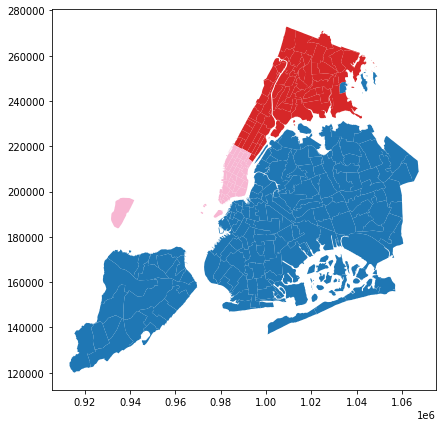

In [34]:
visualizePartitionShape(NYCsf,PCtaxi,'index')